# Homework 4

## Cee Gould

# Part I – Filling a Vector

### Write a short Python code that fills a Numpy vector x with nSteps elements starting with xMin and ending with xMax. Use a for loop instead of predefined functions. Add your code to these lines

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
xMin = 1.2345
xMax = 2.3445
nSteps = 17

In [7]:
x = np.linspace(xMin,xMax,nSteps) #make a code that does this
print(x)

[1.2345   1.303875 1.37325  1.442625 1.512    1.581375 1.65075  1.720125
 1.7895   1.858875 1.92825  1.997625 2.067    2.136375 2.20575  2.275125
 2.3445  ]


In [26]:
x = []
for i in range(0, nSteps):
    step = xMin + (xMax - xMin)/(nSteps-1) * i
    x.append(step)
print(x)

[1.2345, 1.303875, 1.3732499999999999, 1.442625, 1.512, 1.581375, 1.65075, 1.720125, 1.7894999999999999, 1.8588749999999998, 1.92825, 1.997625, 2.067, 2.136375, 2.20575, 2.275125, 2.3445]


# Part II – Ocean Volume after Impact

### (1) Let us assume a giant meteorite hit the Earth and a lot of water is lost to space. Long after impact, the oceans settle to a level that is 1700 meters lower than before. Please compute the new volume of the oceans and determine by how many percent it decreased. (100% refers to the original ocean volume.)

In [141]:
#code from lab
H = np.loadtxt('topography_180x360_grid.txt')
nx = H.shape[1]
ny = H.shape[0]
print(nx, ny)

R = 6371000.0
earth_area = 4.0 * np.pi * R **2
land_area = 0
ocean_volume = 0
ocean_area = 0
for ix in range(0,nx):
    long = ix/nx * 360
    for iy in range(0,ny):
        topography = H[iy,ix]
        lat = 90 - iy/ny*180 - 0.5        
        lx = 2.0*np.pi*R / nx      #length in x
        ly = np.pi * R / ny        #length in y
        tile = lx * ly * np.cos(lat / 180*np.pi)   #tile is the area of each segment
        land_area += tile
        if topography < 0:  #below zero/ less than sea level
            ocean_depth = topography
            ocean_area += tile
            ocean_volume += tile * abs(ocean_depth)  #compute the volume of the oceans by adding height times area for all patches where there is water
                 

print(land_area/earth_area) #value of 1.0 means that land_area is a good approximation for Earth area
print('Land area:', '%g' %land_area) 
print('Ocean area:,', '%g' %ocean_area)
print('ratio:', ocean_area/land_area)   #70.9%
print('Ocean volume: ', '%g' %abs(ocean_volume)) #1.3e18

360 180
1.000012692505221
Land area: 5.10071e+14
Ocean area:, 3.61858e+14
ratio: 0.7094268678858254
Ocean volume:  1.33673e+18


In [142]:
reduced_ocean_volume = 0

for ix in range(0,nx):
    long = ix/nx * 360
    for iy in range(0,ny):
        topography = H[iy,ix]
        lat = 90 - iy/ny*180 - 0.5        
        lx = 2.0*np.pi*R / nx      #length in x
        ly = np.pi * R / ny        #length in y
        tile = lx * ly * np.cos(lat / 180*np.pi)   #tile is the area of each segment
        if topography < -1700:            #below -1700/ less than new sea level
            ocean_depth = topography
            reduced_ocean_volume += tile * abs(ocean_depth)  #add height times area for all patches where there is water
    
print('New volume of oceans:', '%g' %reduced_ocean_volume)
print('Original ocean volume:', '%g' %ocean_volume)
print('Percent of decrease: ', (ocean_volume - reduced_ocean_volume)/ocean_volume)

New volume of oceans: 1.30958e+18
Original ocean volume: 1.33673e+18
Percent of decrease:  0.02030630604052105


# RMS comment
% decrease in volume should be about 41%

### (2) Imagine the water level would magically increase by 600 meters compared to today’s level. Determine how many percent of the new world’s surface would be covered with oceans. (100% refers to entire Earth surface.)

In [201]:
increased_ocean_area = 0

for ix in range(0,nx):
    long = ix/nx * 360
    for iy in range(0,ny):
        topography = H[iy,ix]
        lat = 90 - iy/ny*180 - 0.5        
        lx = 2.0*np.pi*R / nx      #length in x
        ly = np.pi * R / ny        #length in y
        tile = lx * ly * np.cos(lat / 180*np.pi)   #tile is the area of each segment
        
        if topography < 600:            
            increased_ocean_area += tile
            
print('Land area:', '%g' %land_area)
print('Original Ocean area:,', '%g' %ocean_area)
print('New Ocean area:', '%g' %increased_ocean_area)
print('Percent of new world surface covered in ocean:', increased_ocean_area/land_area)
print('Percent increase:', (increased_ocean_area- ocean_area)/ocean_area)


Land area: 5.10071e+14
Original Ocean area:, 3.61858e+14
New Ocean area: 4.51681e+14
Percent of new world surface covered in ocean: 0.885526805123359
Percent increase: 0.2482284576595355


### (3) Finally determine the change in sea level that would cause a 15% increase in ocean volume. (100% refers to the original ocean volume that you calculated in the lab.) You may want to run your code multiple times for different sea levels. A precision for the sea level change of ±2 meters is sufficient.

In [204]:
percent_increase = 1.15  
increased_ocean_volume = ocean_volume * percent_increase
change_in_volume = increased_ocean_volume - ocean_volume 

areas = []


for ix in range(0,nx):
    long = ix/nx * 360
    for iy in range(0,ny):
        #topography = H[iy,ix]
        lat = 90 - iy/ny*180 - 0.5        
        lx = 2.0*np.pi*R / nx      #length in x
        ly = np.pi * R / ny        #length in y
        tile = lx * ly * np.cos(lat / 180*np.pi)   #tile is the area of each segment
        areas.append(tile)

for height in range(0,np.int(np.max(H))):
    #print('height: ', height)
    test_ocean_volume = ocean_volume
    for tile in areas:
        test_ocean_volume += tile * abs(height)
    #print('test ocean volume: ', test_ocean_volume)
    
    if increased_ocean_volume - test_ocean_volume < 2:
        winning_volume = test_ocean_volume
        sealevel = height
        #print('and the winner is: ', height, winning_volume)
        break

         

print('Winning ocean volume: ', winning_volume)
print('Goal ocean volume :', increased_ocean_volume)
print('Ratio: ', winning_volume/increased_ocean_volume)

print('Original Ocean volume:', ocean_volume)
print('Percent increase:', (winning_volume-ocean_volume)/ocean_volume)
print('Change in sea level:', sealevel, 'meters')

Winning ocean volume:  1.537696236248782e+18
Goal ocean volume : 1.537237526095859e+18
Ratio:  1.0002983990080492
Original Ocean volume: 1.3367282835616166e+18
Percent increase: 0.15034315885925653
Change in sea level: 394 meters


# RMS comment
Should be ~494m

# Part III - San Andreas Fault

The San Andreas fault marks the boundary of the Pacific plate, which moves Northwest at an angle
of approximately 32° (counted from straight West, so that 90° would be straight North) at rate of
35 mm per year. This rate is measured relative to the motion of the North American plate (see
arrows in the figure above or consult Wikipedia). The irony is that part of the California belongs
to the Pacific plate and slides northwest with it. So we just have to wait a while until the Los
Angeles airport (LAX) at 33°56’38.89” N and 118°24’09.04” W has moved conveniently close
our campus. Start from the notebook California_coastline_05_for_lab.ipynb on bCourses.

In [476]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [477]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1))  #left hand side, CA coast line
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1))             #right hand side, CA boundary 
print(CAC.shape,CAB.shape)
print(CAB)

(1282, 2) (1295, 2)
[[-120.01464844   41.9676592 ]
 [-119.97070312   38.99357206]
 [-114.08203125   34.30714386]
 ...
 [-124.20368      41.971177  ]
 [-124.20788      41.981513  ]
 [-120.01464844   41.9676592 ]]


In [478]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)  #the second column first value
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)  #the second column last value
ocean = CAC2.copy()
print(np.shape(CAC1), np.shape(CAC2), np.shape(ocean))
print(CAC2)

(1283, 2) (1284, 2) (1284, 2)
[[-117.13219    32.568061]
 [-117.13395    32.592896]
 [-117.12409    32.606766]
 ...
 [-124.20788    41.981513]
 [-125.         41.981513]
 [-125.         32.568061]]


In [479]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)
print(plate)

(925, 2)
[[-115.75283    33.383876]
 [-115.75283    33.383876]
 [-115.79378    33.417648]
 ...
 [-117.12409    32.606766]
 [-117.13395    32.592896]
 [-117.13219    32.568061]]


In [480]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

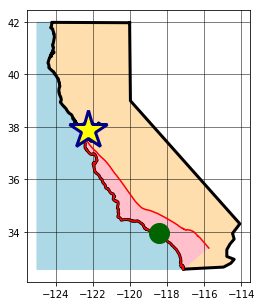

In [481]:
plt.rcParams['figure.figsize'] = [4, 5]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)       #black line of right side of CA
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')   #white fill right of CA

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue') #blue fill left of CA

plt.plot(plate[:,0],plate[:,1],'r-')          #red line of plate
plt.fill(plate[:,0],plate[:,1],'pink')        #red fill of plate

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)                  #dot of LAX
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)  #star of berkeley

plt.grid(color='k', linestyle='-', linewidth=0.5)     #grid is black
plt.show()

a) Based on the provided information and the Earth radius, derive where the land mass west of the
San Andreas fault has moved in 1, 5, and 25 million years. (When you convert from coordinates
in degrees to distances, please ignore the curvature of the Earth. Assume 1 degree of latitude
corresponds to a distance of 2p REarth / 360 and 1 degree of longitude is approximately equal to
pREarth cos(35.5°) / 180. ) Assume the North American plate remains stationary. Determine the
new location of the land portion of the Pacific plate for every time interval. Update the coordinates
in the variable ‘plate’. Plot original and all three updated plate location in one diagram. Choose
different colors for each location. 

#### a.1 convert coordinates to distances

In [482]:
lat_curvature = 2 * np.pi * R / 360

In [483]:
long_curvature = abs(np.pi * R * np.cos(35.5) / 180)

In [484]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(np.shape(plate))
print(plate)

(925, 2)
[[-115.75283    33.383876]
 [-115.75283    33.383876]
 [-115.79378    33.417648]
 ...
 [-117.12409    32.606766]
 [-117.13395    32.592896]
 [-117.13219    32.568061]]


In [485]:
d = 35 * 1e-3 #m in one year
theta = 32 #degrees

In [486]:
a = d * np.sin(theta)  #sin(theta) = a/c
b = d * np.cos(theta)  #cos(theta) = b/c
print(a, b)

0.019299933843459172 0.029197817617727863


In [487]:
# 'has moved' implies back in time, so we're moving Southeast

In [488]:
# in one year
plate_year_1 = np.loadtxt('plate.txt', usecols=(0,1)) 
for i in plate_year_1:
    i[0] = ((long_curvature * i[0]) + b) / long_curvature   #move East, so add
    i[1] = ((lat_curvature  * i[1]) - a) / lat_curvature    #move South, so subtract
    

In [489]:
print(plate_year_1 - plate)

[[ 4.46733523e-07 -1.73568473e-07]
 [ 4.46733523e-07 -1.73568473e-07]
 [ 4.46733523e-07 -1.73568473e-07]
 ...
 [ 4.46733509e-07 -1.73568473e-07]
 [ 4.46733523e-07 -1.73568473e-07]
 [ 4.46733509e-07 -1.73568473e-07]]


In [490]:
# in one million years
plate_year_1_mil = np.loadtxt('plate.txt', usecols=(0,1)) 
for i in plate_year_1_mil:
    i[0] = ((long_curvature * i[0]) + (b * 1e6)) / long_curvature   #move East, so add
    i[1] = ((lat_curvature  * i[1]) - (a *1e6))/ lat_curvature   #move South, so subtract

lat_LAX_1_mil = ((lat_curvature * lat_LAX) - (a *1e6)) / lat_curvature
lon_LAX_1_mil = ((long_curvature * lon_LAX) + (b * 1e6)) / long_curvature

In [491]:
# in five million years
plate_year_5_mil = np.loadtxt('plate.txt', usecols=(0,1)) 
for i in plate_year_5_mil:
    i[0] = ((long_curvature * i[0]) + (b * 5e6)) / long_curvature   #move East, so add
    i[1] = ((lat_curvature * i[1]) - (a *5e6)) / lat_curvature   #move South, so subtract

lat_LAX_5_mil = ((lat_curvature * lat_LAX) - (a *5e6)) / lat_curvature
lon_LAX_5_mil = ((long_curvature * lon_LAX) + (b * 5e6)) / long_curvature

In [492]:
# in 25 million years
plate_year_25_mil = np.loadtxt('plate.txt', usecols=(0,1)) 
for i in plate_year_25_mil:
    i[0] = ((long_curvature * i[0]) + (b * 25e6))/long_curvature   #move East, so add
    i[1] = ((lat_curvature * i[1]) - (a *25e6))/ lat_curvature   #move South, so subtract

lat_LAX_25_mil = ((lat_curvature * lat_LAX) - (a *25e6)) / lat_curvature
lon_LAX_25_mil = ((long_curvature * lon_LAX) + (b * 25e6)) / long_curvature

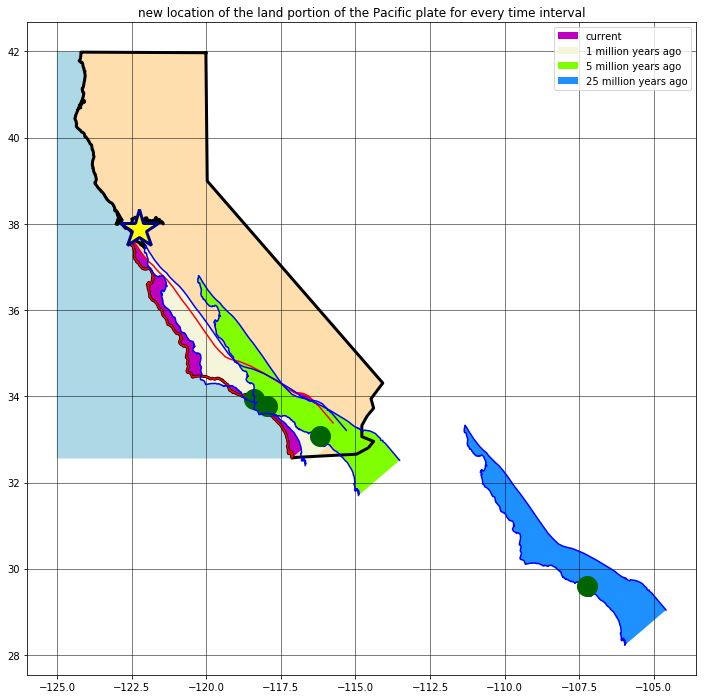

In [493]:
plt.rcParams['figure.figsize'] = [12, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)       #black line of right side of CA
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')   #white fill right of CA

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue') #blue fill left of CA

#plot the current fault line
plt.plot(plate[:,0],plate[:,1],'r-')          
plt.fill(plate[:,0],plate[:,1],'m', label = 'current')        
plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)                  #dot of LAX

#plot the 1 mil year ago fault line
plt.plot(plate_year_1_mil[:,0],plate_year_1_mil[:,1],'b-')          
plt.fill(plate_year_1_mil[:,0],plate_year_1_mil[:,1],'beige', label = '1 million years ago') 
plt.plot(lon_LAX_1_mil,lat_LAX_1_mil,'o',color='darkgreen',ms=20)                  #dot of LAX

#plot the 5 mil year ago fault line
plt.plot(plate_year_5_mil[:,0],plate_year_5_mil[:,1],'b-')          
plt.fill(plate_year_5_mil[:,0],plate_year_5_mil[:,1],'chartreuse', label = '5 million years ago') 
plt.plot(lon_LAX_5_mil,lat_LAX_5_mil,'o',color='darkgreen',ms=20)                  #dot of LAX

#plot the 25 mil year ago fault line
plt.plot(plate_year_25_mil[:,0],plate_year_25_mil[:,1],'b-')          
plt.fill(plate_year_25_mil[:,0],plate_year_25_mil[:,1],'dodgerblue', label='25 million years ago')   
plt.plot(lon_LAX_25_mil,lat_LAX_25_mil,'o',color='darkgreen',ms=20)                  #dot of LAX

plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)  #star of berkeley

plt.grid(color='k', linestyle='-', linewidth=0.5)     #grid is black
plt.legend()
plt.title('new location of the land portion of the Pacific plate for every time interval')
plt.show()

b) How long do we have to until the latitude of the LAX airport coincides with that of campanile
on our campus (37°52’19.54” N and 122°15’28.19” W)? Answers with ±2% will be accepted.

In [498]:
time = 0 #years
for i in range(0,np.int(25e6)):
    lat_LAX_campus = ((lat_curvature * lat_LAX) + (a * time)) / lat_curvature #North, so add
    lon_LAX_campus = ((long_curvature * lon_LAX) - (b * time)) / long_curvature #West, so subtract
    #print(i, lat_LAX_campus)
    if lat_UCB - lat_LAX_campus < .02:
        print('Years of waiting:' , '%g' %time, 'years')
        print('LAX coordinates: ' , lat_LAX_campus, lon_LAX_campus)
        print('UCB coordinates: ', lat_UCB, lon_UCB)
        print(lat_LAX_campus/ lat_UCB)
        print((lat_UCB - lat_LAX_campus)/lat_UCB)
        break
    time += i

Years of waiting: 2.25288e+07 years
LAX coordinates:  37.851894319097404 -128.47288251876188
UCB coordinates:  37.8716 -122.2727
0.9994796712865948
0.0005203287134052064


# RMS comment
Your code is correct, but there must be a negative sign missing in your north component. California should be moving north ralative to NA!